# Начинкин Илья, 695; ДЗ №6

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns

%matplotlib inline

## Задача 1

Градиент функции липшецев с константой $L$, т.е.

$$\Vert{\nabla f(x) - \nabla f(y)}\Vert \leq L \Vert x - y \Vert  \Rightarrow \Vert{\nabla f(x + f\Delta x) - \nabla f(x)}\Vert \leq L \Vert \Delta x \Vert \Rightarrow \frac{\Vert{\nabla f(x + f\Delta x) - \nabla f(x)}\Vert}{\Vert \Delta x \Vert} \leq L $$

Т.к. $\lim_{\Delta x \to 0} \frac{f'(x+\Delta x) - f'(x)} {||\Delta x||} = f(x)'' \Rightarrow \lim_{\Delta x \to 0} \frac{\Vert f'(x+\Delta x) - f'(x)\Vert}{\Vert \Delta x \Vert} = \Vert f(x)'' \Vert  \leq L$. Что и требовалось.  

## Градиентный спуск, задача 1

В наискорейшем спуске у нас: $x_{k+1} = x_k - \alpha \nabla f(x)$, где $\alpha =  \underset{\alpha}{argmin} [f(x_k - \alpha \nabla f(x_k))]$

Пусть на $k-$ом шаге достигается минимум в точке $\alpha_k$

Так как мы минимизируем $\Rightarrow \frac{d f(x_k - \alpha_k \nabla f(x_k))}{d \alpha} = 0 \Rightarrow$ По правилу дифф-я сложной функции $ \langle \nabla f(x_k), \nabla f(x_k - \alpha_k \nabla f(x_k)) \rangle = 0 \Rightarrow \langle \nabla f(x_k), \nabla f(x_{k+1}) \rangle$. Что и требовалось.

## Градиентный спуск, задача 2

$f(x) = |x|^{2 + \alpha}, \alpha > 0$
Шаг в градиентном спуске: $x_{k+1} = x_k - t*(2 + \alpha) * \nabla(f(x_k)) \ $

 Найдем такие значения $x_0$, при котором значения будут расходиться.
 
 Для, то есть нужно, чтобы  $f(x_{k+1}) > f(x_k)$, или $|x_{k+1}| > |x_k|$, так как функция - степень от модуля.
 
 Далее, пусть к примеру $x_{k} > 0$. Тогда  , т.к. $(1 - t*(2 + \alpha) * x_k^{\alpha}) < 1$, то, в силу того, что $|x_{k+1}| = |x_k(1 - t*(2 + \alpha) * x_k^{\alpha})| > |x_k|$, то $x_{k+1} < 0 \Rightarrow  -\frac{x_{k+1}}{x_k} \geq 1$
 
 $(1 - t*(2 + \alpha) * x_k^{\alpha}) \geq -1 \Rightarrow x_k >= (\frac{2}{t(2 + \alpha)})^{1/\alpha}$ 
 
 Аналогично, для $x_k < 0$
 
 То есть если $|x_0| >= (\frac{2}{t(2 + \alpha)})^{1/\alpha}$, то градиентный метод расходится, и легко аналогично показать, что если в  равенсте знак меньше, то метод будет сходится.
 
 
 Построим это для следующих значений:
 
$\alpha = \frac{2}{3}, t = 0.05$, тогда:   $(\frac{2}{t(2 + \alpha)})^{1/\alpha} \approx 58.095$.


Продемонстрируем, что будет происходить, при $x_0 < 58.095$ и при $x_0 \geq 58.095$

In [2]:
#следующий код реализует градиентный спуск

alpha = 2/3 
step = 0.05 # постоянная длина шага
eps = 1e-3 # взяли следующую точность 

#сама функция f(x)
def f(x):
    return np.abs(x)**(2 + alpha)

#направление, то есть в данном случае -f'(x)
def h(x):
    deriv = (2  + alpha)*np.abs(x)**(1 + alpha)
    if x < 0:
        return -deriv
    elif x > 0:
        return deriv
    else:
        return 0

#критерий остановки: ||f'(x)|| >= eps    
def stop_clause(x, esp):
    return abs(h(x)) > eps

#реализация спуска
def grad_descent(x0, step, eps, h, N):
    """
    x0 - начальная точка
    step - длина шага
    eps - точность
    h - функция h(x) - направление 
    N - макс. кол-во итераций
    """
    iteration = [x0]
    x = x0
    crits = [abs(h(x0))]
    while(stop_clause(x, eps) and \
          len(iteration) <= N ):
        x = x - step*h(x)
        iteration.append(x)
        crits.append(abs(h(x)))
    return (iteration, crits)

#рисует графики
def get_plot(points, crits):
    grid = np.linspace(np.min(points) - 0.5, np.max(points) + 0.5, 1000) 
    plt.subplot(2, 1, 1)
    plt.title(r'Grad descent for $f(x) = |x|^{2 + \alpha}, \alpha = %.2f, x_0 = %.2f$, count of iters = %d' % \
          (alpha, points[0], len(points)), fontsize=14)
    plt.plot(grid, f(grid), label='fucntion')
    plt.plot(points[:-1], f(points[:-1]),linestyle='--',c='r', 
             marker='.',label='iterations in the descent')
    plt.scatter(points[-1], f(points[-1]), c='r', marker='+')
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title(r'$|\nabla f(x_k)|$ в зависимости от k', fontsize=14)
    plt.plot(np.arange(1, len(crits) + 1), crits)
    plt.scatter(np.arange(1, len(crits) + 1), crits)
    
    plt.xlabel('k')
    

Попробуем проделать это для $x_0 < 58.095$, Например, для $x_0 = 58.09$

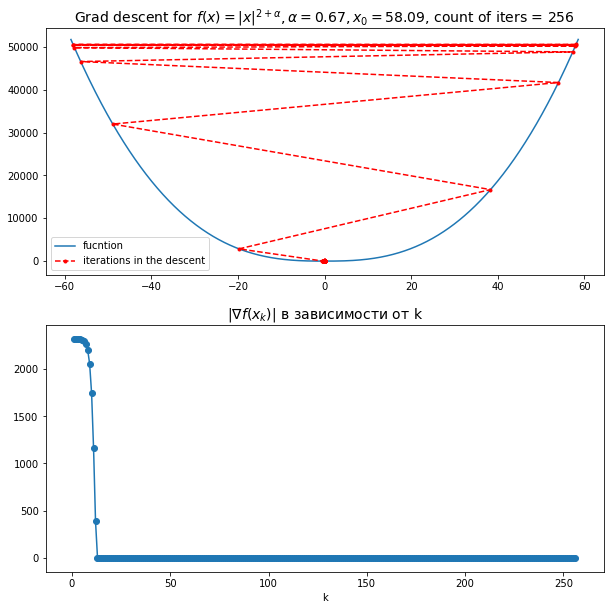

In [99]:
#попробуем для x0 = 58.09
x0 = 58.09
    
points, crits = grad_descent(x0, step, eps, h, N=1500)
    
plt.figure(figsize=(10, 10))    

get_plot(points, crits)

plt.show()



Теперь проделаем тоже самое для $x_0 = 58.096 > 58.095$

/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':


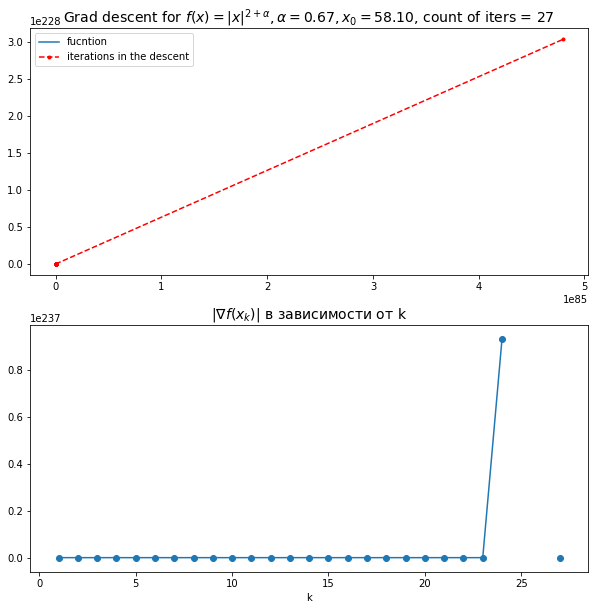

In [100]:
#попробуем для x0 = 58.096
x0 = 58.096
    
points, crits = grad_descent(x0, step, eps, h, N=1500)
    
plt.figure(figsize=(10, 10))    

get_plot(points, crits)

plt.show()

Как мы видим, эксперименты подтверждают теор. свойства, действительно, если начальная точка меньше критического значения, то метод сходится. Если наоборот, то метод расходится.

## Градиентный спуск, задача 3

$f_1(x, y) = (x - 5)^2 + (y + 2)^2$

$f_2(x, y) = (1 - (y - 4))^2 + 35((x + 6) - (y - 4)^2)^2$

In [55]:
def f1(x, y):
    return (x - 5)**2 + (y + 2)**2

def f2(x, y):
    return (1 - (y - 4))**2 + 35*((x + 6) - (y - 4)**2)**2

def der_f1(x, y):
    return 2*(x - 5), 2*(y + 2)

def der_f2(x, y):
    return 70*(x - (y - 4)**2 + 6), 2*(-70*(y - 4)*(x - (y - 4)**2 + 6) + y - 5)
    
    
def const_step(alpha, *args):
    return alpha

def aprior_step(alpha, k):
    return alpha / (k + 1)**0.5

#со следующие условиями остановки будем эспериментировать

#сходимость по аргументу
def arg_clause(x0, x1, *args):
    return np.linalg.norm(x0 - x1) > 2*eps

#сходимость по функции 
def func_clause(x0, x1, f, *args):
    return np.abs(f(*x0) - f(*x1)) > 2*eps


#условие нормы градиента
def func_der(x, dummy, f, der_f):
    return np.linalg.norm(der_f(*x)) > eps


In [107]:
#Реализация градиентного спуска

def grad_descent(f, der_f, x0, step, clause, alpha):
    iters = [x0]
    crits = [np.linalg.norm(der_f(*x0))**2]
    
    
    x1 = x0 - alpha*np.array(der_f(*x0)) 
    iters.append(x1)
    crits.append(np.linalg.norm(der_f(*x1))**2)
    
    while (clause(x1, x0, f, der_f)):
        alpha = step(alpha, len(iters))
        x0 = x1
        x1 = x0 - alpha*np.array(der_f(*x0))
        
        iters.append(x1)
        crits.append(np.linalg.norm(der_f(*x1))**2)
        
        
    return iters, crits
 
    
def get_plot(f, points, crits, title):
    grid = np.arange(1, len(points) + 1)
    
    plt.subplot(2,1, 1)
    
    fs = [f(*point) for point in points]
    plt.title(title + "\n count of iters = %d" % (len(points)),
             fontsize=15)
    plt.plot(grid, fs, marker='.', linestyle='-',
             markersize=10, markerfacecolor='#FF0000')
    plt.xlabel('k', fontsize=13)
    plt.ylabel(r'$f(x_k)$', fontsize=13)
    
    plt.subplot(2, 1, 2)
    
    plt.plot(grid, crits, marker='.', linestyle='-',
             markersize=10, markerfacecolor='#FF0000')
    plt.xlabel('k', fontsize=13)
    plt.ylabel(r'$\Vert{\nabla f(x)}\Vert ^2$', fontsize=13)

**Функция $f_1(x, y) = (x - 5)^2 + (y + 2)^2$, с константной длиной шага $\alpha = const$, с сходимостью по аргументу :**

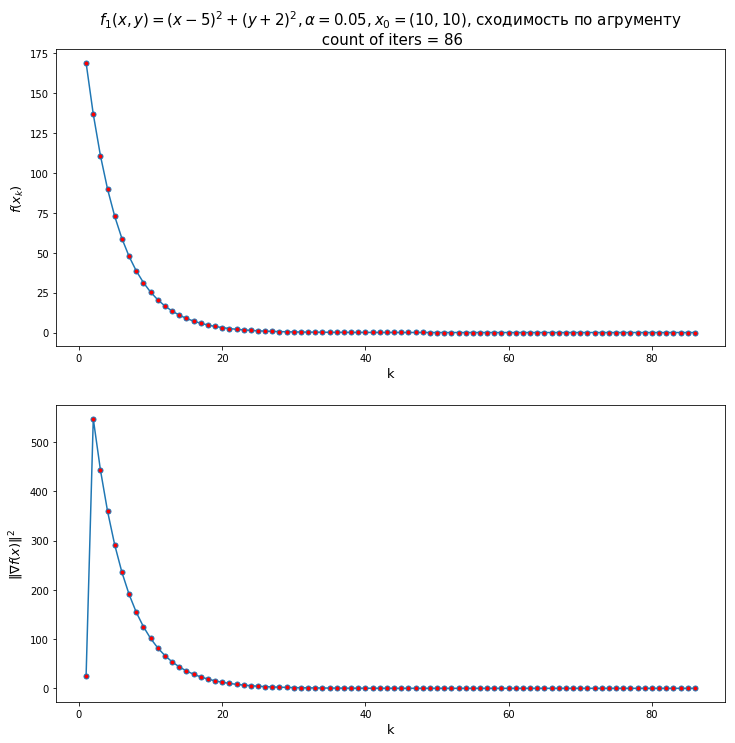

In [9]:
eps = 1e-4
x0 = np.array((10, 10))
alpha = 0.05

points, crits = grad_descent(f1, der_f1, x0, const_step, arg_clause, alpha)

plt.figure(figsize=(12, 12))

get_plot(f1, points, crits,
    r"$f_1(x, y) = (x - 5)^2 + (y + 2)^2, \alpha = 0.05, x_0=(10, 10)$, сходимость по агрументу")

plt.show()


**Функция $f_1(x, y) = (x - 5)^2 + (y + 2)^2$, с константной длиной шага $\alpha = const$, с сходимостью по функции :**

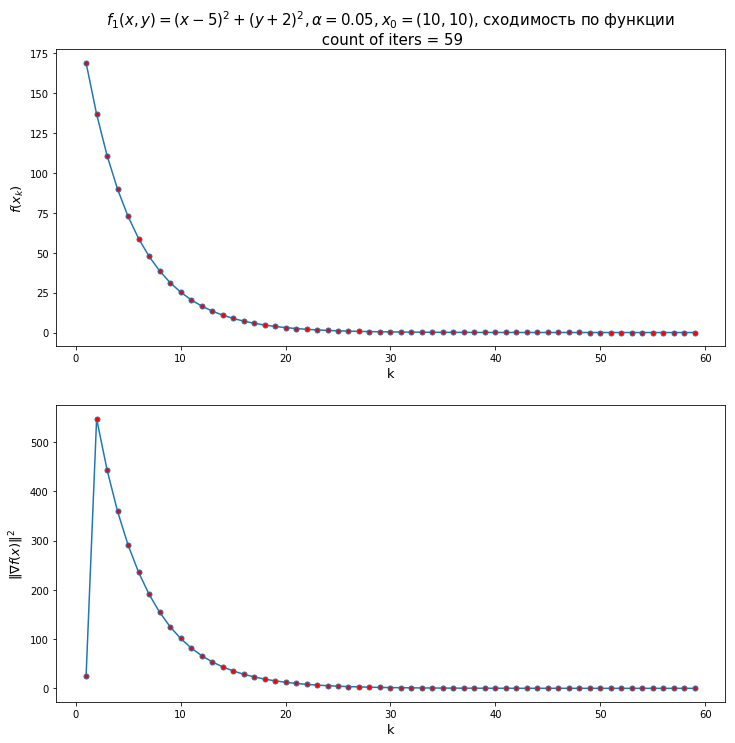

In [10]:
points, crits = grad_descent(f1, der_f1, x0, const_step, func_clause, alpha)

plt.figure(figsize=(12, 12))

get_plot(f1, points, crits,
    r"$f_1(x, y) = (x - 5)^2 + (y + 2)^2, \alpha = 0.05, x_0 = (10, 10)$, сходимость по функции")

plt.show()

Здесь мы можем видеть, что если выбирать сходимость по фукнции, то итераций получается меньше, чем при сходимости по аргументу.  

**Функция $f_1(x, y) = (x - 5)^2 + (y + 2)^2$, с константной длиной шага $\alpha = const$, сходимость $\Vert{\nabla f(x)}\Vert \leq \epsilon$:**

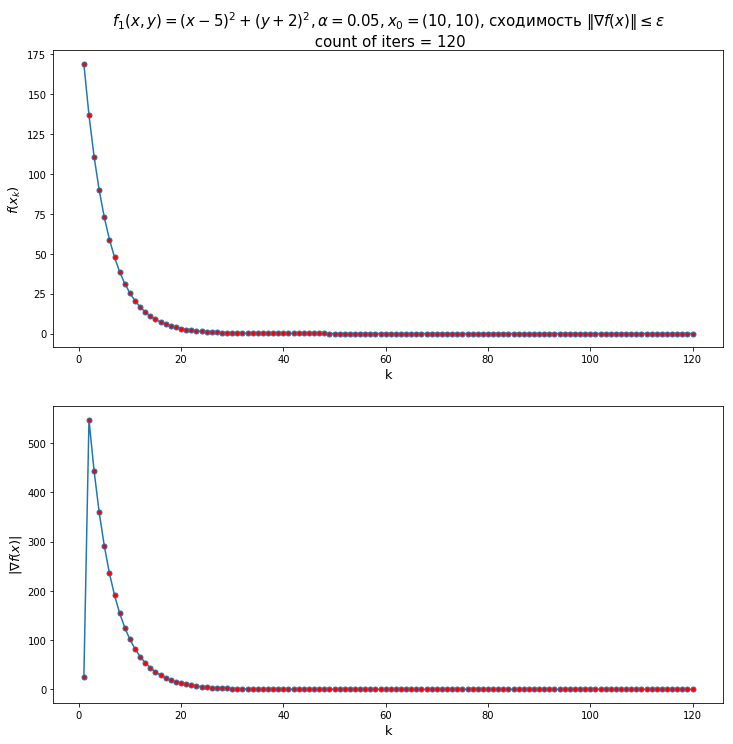

In [6]:
points, crits = grad_descent(f1, der_f1, x0, const_step, func_der, alpha)

plt.figure(figsize=(12, 12))

get_plot(f1, points, crits,
    r"$f_1(x, y) = (x - 5)^2 + (y + 2)^2, \alpha = 0.05, x_0 = (10, 10)$, сходимость $\Vert{\nabla f(x)}\Vert \leq \epsilon$")

plt.show()

Здесь мы видим, что при применении сходимости  $\Vert{\nabla f(x)}\Vert \leq \epsilon$, то метод также сходится, но итераций стало почти в два раза больше.

**Функция $f_1(x, y) = (x - 5)^2 + (y + 2)^2$, с дроблением  шага $\alpha_k = \frac{\alpha}{\sqrt{k+1}}$, сходимость по функции:**

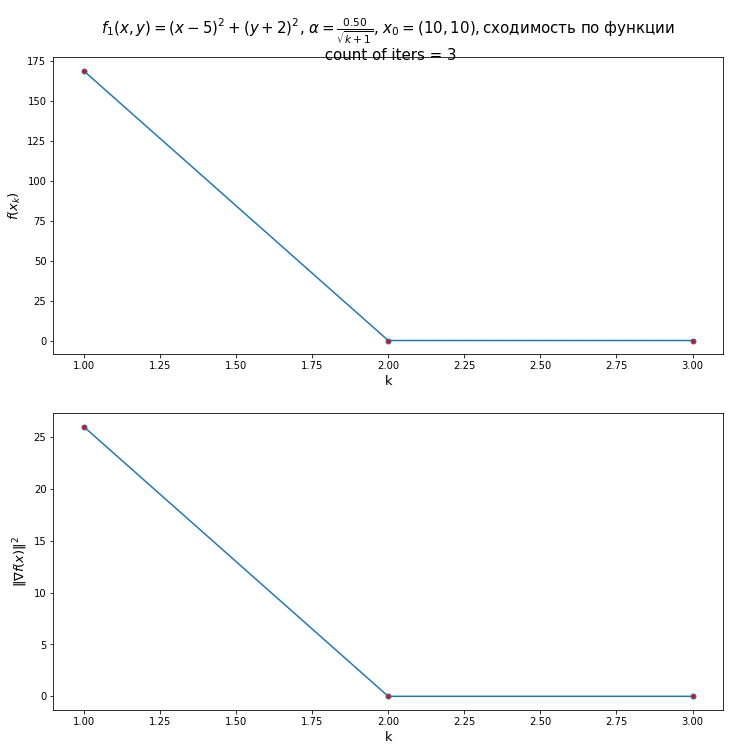

In [13]:
x0 = np.array((10, 10))
alpha = 0.5

func_str = r"$f_1(x, y) = (x - 5)^2 + (y + 2)^2$, "
alpha_str = r"$\alpha = \frac{%.2f} {\sqrt{k+1}}$, " % (alpha)
x0_str = r"$x_0 = (%d, %d), $" % (x0[0], x0[1])
conv_str = "сходимость по функции"


points, crits = grad_descent(f1, der_f1, x0, aprior_step, func_clause, alpha)

plt.figure(figsize=(12, 12))

get_plot(f1, points, crits,
    func_str + alpha_str + x0_str + conv_str)

plt.show()

Здесь мы видим, что при дроблении шага сходимость наступает гораздо быстрее, то есть при гораздо меньшем количестве итераций, чем при константном шаге 

**Функция $f_2(x, y) = (1 - (y - 4))^2 + 35((x + 6) - (y - 4)^2)^2$, с константной длиной шага $\alpha = const$, с сходимостью по аргументу :**

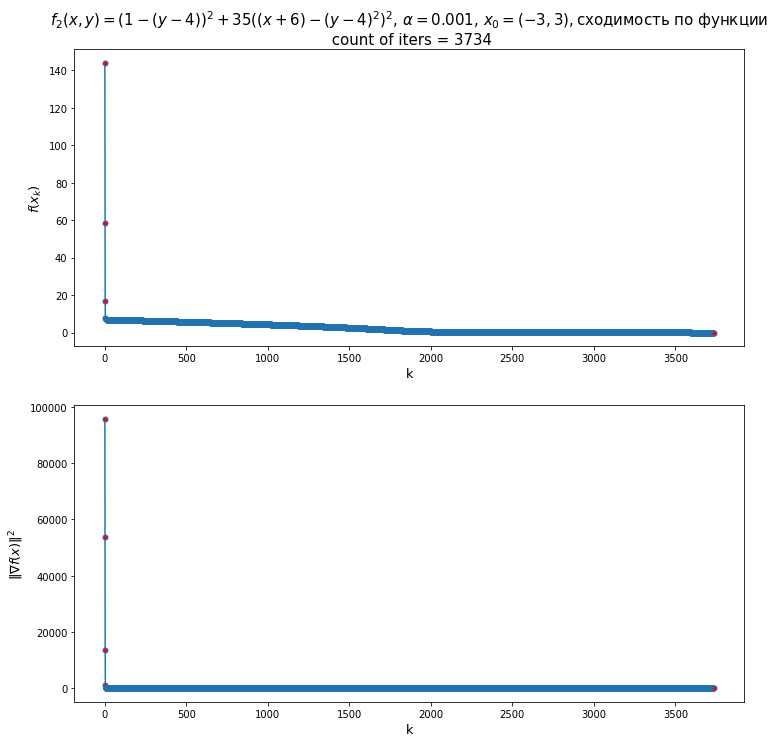

In [136]:
x0 = np.array((-3, 3))
alpha = 0.001
eps = 1e-4


func_str = r"$f_2(x, y) = (1 - (y - 4))^2 + 35((x + 6) - (y - 4)^2)^2$, "
alpha_str = r"$\alpha = %.3f$, " % (alpha)
x0_str = r"$x_0 = (%d, %d), $" % (x0[0], x0[1])
conv_str = "сходимость по функции"


points, crits = grad_descent(f2, der_f2, x0, const_step, arg_clause, alpha)

plt.figure(figsize=(12, 12))

get_plot(f2, points, crits,
    func_str + alpha_str + x0_str + conv_str)

plt.show()

Мы видим, что в силу сложности нашей функции(функция 4ой степени), у нас функция сходится очень медленно, видимо что потребовалось несколько тысяч итераций, чтобы функция сошлась к минимуму

**Функция $f_2(x, y) = (1 - (y - 4))^2 + 35((x + 6) - (y - 4)^2)^2$, с константной длиной шага $\alpha = const$, с сходимостью по функции :**

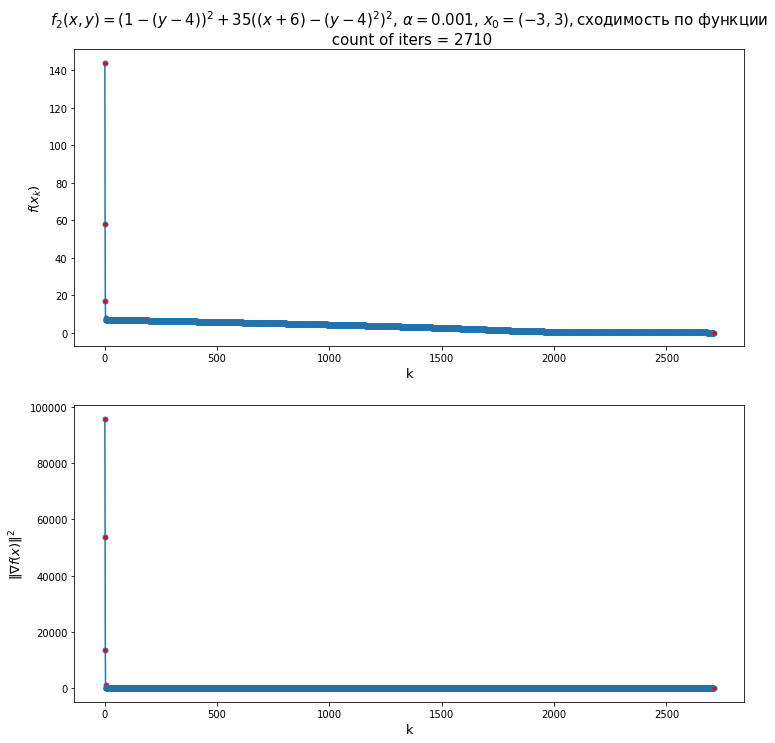

In [38]:
x0 = np.array((-3, 3))
alpha = 0.001
eps = 1e-4


func_str = r"$f_2(x, y) = (1 - (y - 4))^2 + 35((x + 6) - (y - 4)^2)^2$, "
alpha_str = r"$\alpha = %.3f$, " % (alpha)
x0_str = r"$x_0 = (%d, %d), $" % (x0[0], x0[1])
conv_str = "сходимость по функции"


points, crits = grad_descent(f2, der_f2, x0, const_step, func_clause, alpha)

plt.figure(figsize=(12, 12))

get_plot(f2, points, crits,
    func_str + alpha_str + x0_str + conv_str)

plt.show()

Здесь потребовалось существенно меньше итераций, чтобы сойтись.

**Функция $f_2(x, y) = (1 - (y - 4))^2 + 35((x + 6) - (y - 4)^2)^2$, с априорной длиной шага $\alpha = \frac{0.5}{\sqrt{k+1}}$, с сходимостью по функции :**

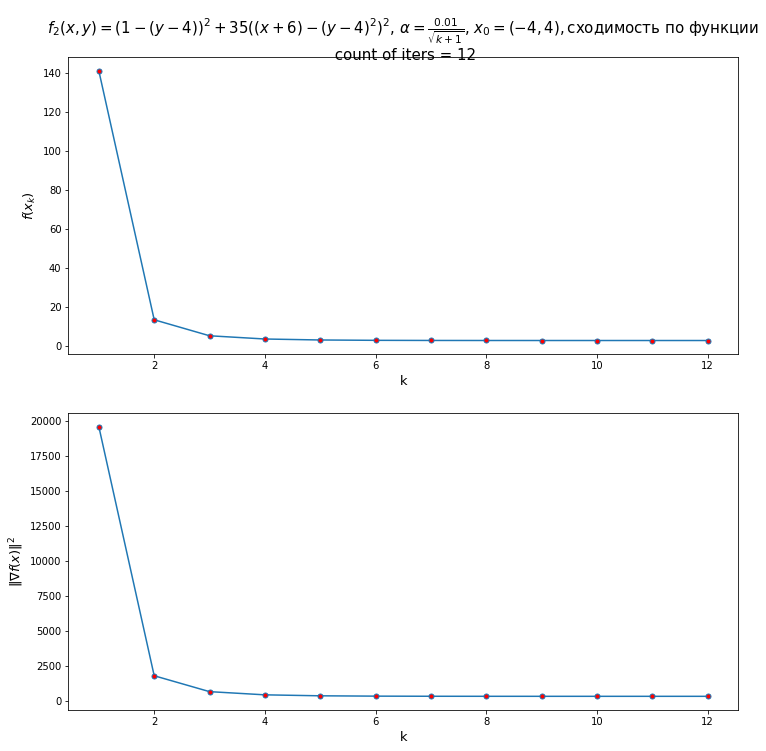

In [68]:
x0 = np.array((-4, 4))
alpha = 0.01
eps = 1e-4


func_str = r"$f_2(x, y) = (1 - (y - 4))^2 + 35((x + 6) - (y - 4)^2)^2$, "
alpha_str = r"$\alpha = \frac{%.2f}{\sqrt{k+1}}$, " % (alpha)
x0_str = r"$x_0 = (%d, %d), $" % (x0[0], x0[1])
conv_str = "сходимость по функции"


points, crits = grad_descent(f2, der_f2, x0, aprior_step, func_clause, alpha)

plt.figure(figsize=(12, 12))

get_plot(f2, points, crits,
    func_str + alpha_str + x0_str + conv_str)

plt.show()

Градиентный метод при таком выборе шага сходится гораздо быстрее, всего чуть больше чем за 10 итераций. Но вместе с этим такой метод гораздо более "капризен" в выборе шага - нужно постараться найти правильную начальную точку. 

**Вывод:** Было показано, что в зависимости от выбора различных критериев остановки и выбора длины шага меняется скорость сходимости. Конкретно можно сказать, что при дроблении шага сходимость получается гораздо быстрее, чем при константном выборе шага. Кроме того, можно сказать, что константы, которые были выбраны для первой функции, не подходили для второй функции в силу сложности последней (4ая степень), так как слишком большая длина шага $\alpha$.

##  Градиентный спуск, задача 4


In [121]:
def get_plot4(f, points, crits, title):
    grid = np.arange(1, len(points) + 1)
    
    plt.subplot(1, 3, 1)
    
    fs = [f(*point) for point in points]


    plt.plot(grid, fs, marker='.', linestyle='-',
             markersize=10, markerfacecolor='#FF0000', label=r'$f(x_k)$')
    plt.xlabel('k', fontsize=13)
    plt.ylabel(r'$f(x_k)$', fontsize=13)
    
    plt.legend(fontsize=14)
    
    plt.subplot(1, 3, 2)
    
    plt.title(title + "\n count of iters = %d" % (len(points)),
             fontsize=15)
    
    plt.plot(grid, crits, marker='.', linestyle='-',
             markersize=10, markerfacecolor='#FF0000',
            label=r'$\Vert{\nabla f(x_k)}\Vert ^2$')
    plt.xlabel('k', fontsize=13)
    plt.ylabel(r'$\Vert{\nabla f(x)}\Vert ^2$', fontsize=13)
    
    plt.legend(fontsize=14)
    
    x = np.linspace(np.min(points[:, 0]) - 1, np.max(points[:, 0]) + 1, 10)
    y = np.linspace(np.min(points[:, 1]) - 1, np.max(points[:, 1]) + 1, 10)
    
    
    X, Y = np.meshgrid(x, y)    
    Z = ([[f(xt,yt) for xt in x] for yt in x])
    
    plt.subplot(1, 3, 3)
    
    plt.pcolormesh(X, Y, Z, cmap='Oranges', label='function')
    plt.contour(X, Y, Z)
    
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    
    plt.plot(points[:, 0], points[:, 1],linestyle='--',c='r', 
             marker='.',label='iterations in the descent')
    plt.legend()
    plt.show()

Попробуем для функции $f(x) = (x - 9)^2 + (y - 8)^2 + 100$

Для нее константа Липшица: $L = 2$
Константа сильной выпуклости: $l = 2$

Тогда число обусловленности = $\frac{L}{l} = 1$. По теореме возьмем $\alpha = \frac{2}{L + l} = 0.5$

In [62]:
def D1(x, y):
    return (x - 9 )**2 + (y - 8)**2 + 100
def der_D1(x, y):
    return (2*(x - 9),2*(y - 8))

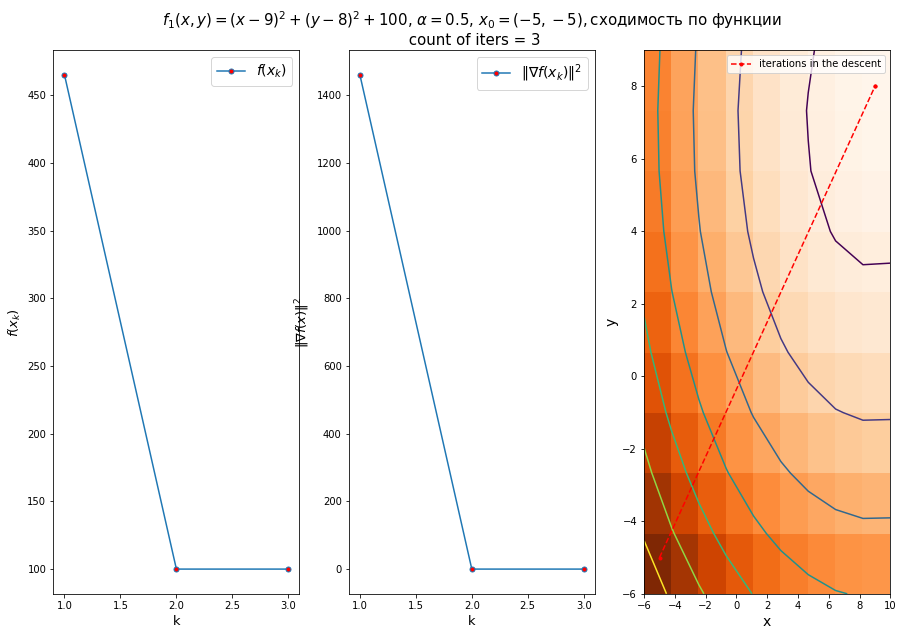

In [122]:
eps=1e-4
x0 = np.array((-5, -5))
alpha = 0.5
eps = 1e-4


func_str = r"$f_1(x, y) = (x - 9)^2 + (y - 8)^2 + 100$, "
alpha_str = r"$\alpha = %.1f$, " % (alpha)
x0_str = r"$x_0 = (%d, %d), $" % (x0[0], x0[1])
conv_str = "сходимость по функции"


points, crits = grad_descent(D1, der_D1, x0, const_step, func_clause, alpha) 

plt.figure(figsize=(15,10))
plt.title(func_str + \
         alpha_str + r"$x_0 = (%d, %d), $" % (x0[0], x0[1]) + \
         conv_str)


get_plot4(D1, np.array(points), np.array(crits), func_str + \
         alpha_str + r"$x_0 = (%d, %d), $" % (x0[0], x0[1]) + \
         conv_str)



Попробуем для функции $f(x) = 6(x - 1)^2 + 4(y - 8)^2$

Для нее константа Липшица: $L = 12$
Константа сильной выпуклости: $l = 8$

Тогда число обусловленности = $\frac{L}{l} = \frac{3}{2}$. По теореме возьмем $\alpha = \frac{2}{L + l} = 0.1$

In [114]:
def D2(x, y):
    return 6*(x - 1)**2 + 4*(y - 8)**2
def der_D2(x, y):
    return 12*(x - 1),8*(y - 8)

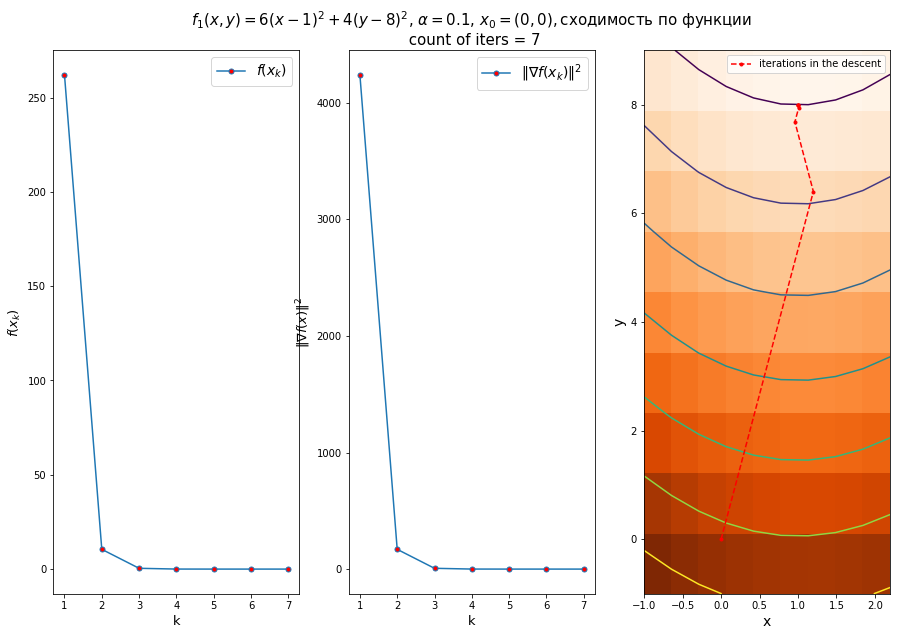

In [123]:
eps=1e-4
x0 = np.array((0, 0))
alpha = 0.1


func_str = r"$f_1(x, y) = 6(x - 1)^2 + 4(y - 8)^2$, "
alpha_str = r"$\alpha = %.1f$, " % (alpha)
x0_str = r"$x_0 = (%d, %d), $" % (x0[0], x0[1])
conv_str = "сходимость по функции"


points, crits = grad_descent(D2, der_D2, x0, const_step, func_clause, alpha) 

plt.figure(figsize=(15,10))
plt.title(func_str + \
         alpha_str + r"$x_0 = (%d, %d), $" % (x0[0], x0[1]) + \
         conv_str)


get_plot4(D2, np.array(points), np.array(crits), func_str + \
         alpha_str + r"$x_0 = (%d, %d), $" % (x0[0], x0[1]) + \
         conv_str)

**Вывод:** Действительно, наши примеры подтверждают теоретические свойства, показанные в соответствующей теореме, что чем больше число обусловленности, тем больше итераций требуется методу для сходимости.

##  Метод Ньютона, задача 1

In [143]:
def f(x):
    return np.log(np.exp(x) + np.exp(-x))

def der_f(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def der2_f(x):
    return 4/(np.exp(x) + np.exp(-x))**2


def fun_clause(x0, x1):
    return abs(f(x0) - f(x1)) > 2*eps

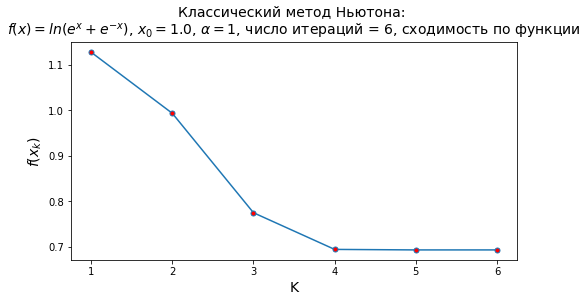

/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


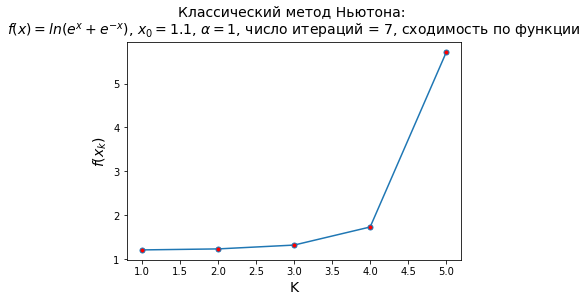

In [145]:
eps = 1e-4


def NewtonMethod(x0, clause,alpha = 1):
    points = [x0]
    x1 = x0 - alpha*der_f(x0)/der2_f(x0)
    points.append(x1)
    
    while (clause(x0, x1)):
        x0 = x1
        x1 = x0 - alpha*der_f(x0)/der2_f(x0)
        points.append(x1)
    return np.array(points)


def get_newton_plot(points, title):
    grid = np.arange(1, len(points) + 1)
    
    plt.title(title, fontsize=14)
    plt.plot(grid, f(points),marker='.', linestyle='-',
             markersize=10, markerfacecolor='#FF0000')    

    plt.xlabel('K', fontsize=14)
    plt.ylabel(r'$f(x_k)$', fontsize=14)

    
x0 = 1
alpha = 1

points = NewtonMethod(x0, fun_clause, alpha=1)    

func_str = r"$f(x) = ln(e^x + e^{-x})$, "
x0_str = r"$x_0 = %.1f$, " % (x0)
alpha_str = r"$\alpha = %d$, " % (alpha)
step_str = "число итераций = %d, " % (len(points))   
conj_str = "сходимость по функции"    
    
plt.figure(figsize=(8, 4))

get_newton_plot(points,  "Классический метод Ньютона: \n" + \
func_str + x0_str + alpha_str + step_str + conj_str)    

plt.show()


x0 = 1.1
points = NewtonMethod(x0, fun_clause, alpha=1)

get_newton_plot(points, "Классический метод Ньютона: \n" + \
func_str + r"$x_0 = %.1f$, " % (x0) + alpha_str + \
"число итераций = %d, " % (len(points)) + conj_str)

plt.show()

Мы видим, что при $x_0 = 1.1$  метод расходится, хоть она и не сильно отличается от предыдущей точки. То есть в методе Ньютона от начального приближения очень многое зависит.

In [133]:
def minimize_alpha(x, c):
    return opt.minimize(lambda alpa: f(x - alpha * c), 
                                   method='Nelder-Mead', x0 = 0.5).x

def dempNewton(x0, clause):
    points = [x0]
    x1 = x0 - minimize_alpha(x0, 
                der_f(x0)/der2_f(x0)) * der_f(x0)/der2_f(x0)
    points.append(x1)
    
    while (clause(x0, x1)):
        x0 = x1
        x1 = x0 - minimize_alpha(x0, 
                der_f(x0)/der2_f(x0)) * der_f(x0)/der2_f(x0)
        points.append(x1)
    return np.array(points)

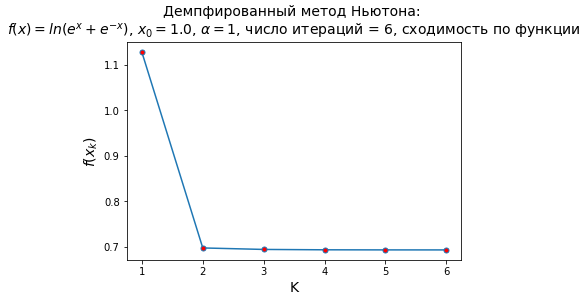

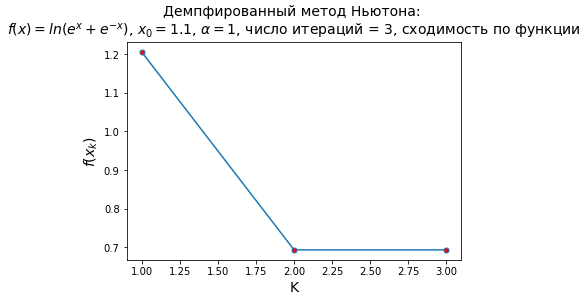

In [135]:
eps = 1e-4
x0 = 1

points = dempNewton(x0, func_clause)

plt.figure()
get_newton_plot(points,  "Демпфированный метод Ньютона: \n" + \
func_str + r"$x_0 = %.1f$, " % (x0) + alpha_str + \
            "число итераций = %d, " % (len(points))  + conj_str)

plt.show()


x0 = 1.1
points = dempNewton(x0, func_clause)


plt.figure()
get_newton_plot(points,  "Демпфированный метод Ньютона: \n" + \
func_str + r"$x_0 = %.1f$, " % (x0) + alpha_str + \
            "число итераций = %d, " % (len(points))  + conj_str)

plt.show()

**Вывод:** Второй, метод, конечно, будет работать медленней, в силу того, что надо будет каждый раз минимизировать функцию $ min_{\alpha}f(x - \alpha*[\nabla^2]^{-1}f(x) * \nabla f(x))$, чтобы найти оптимальный $\alpha$. Но зато можно увидеть, что во втором методе, в отличие от первого, есть сходимость при начальном приближении в т. $x_0 = 1.1$